In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9039 - loss: 0.3189 - val_accuracy: 0.9867 - val_loss: 0.0511
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9845 - loss: 0.0489 - val_accuracy: 0.9878 - val_loss: 0.0450
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9880 - val_loss: 0.0423
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9946 - loss: 0.0150 - val_accuracy: 0.9897 - val_loss: 0.0375


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Acurácia nos dados de teste: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9871 - loss: 0.0382
Acurácia nos dados de teste: 0.9894000291824341


In [10]:
num_train_images = len(x_train)
num_train_labels = len(y_train)

num_test_images = len(x_test)
num_test_labels = len(y_test)

# Exibir as quantidades
print(f"Conjunto de Treino: {num_train_images} imagens, {num_train_labels} rótulos.")
print(f"Conjunto de Teste: {num_test_images} imagens, {num_test_labels} rótulos.")

Conjunto de Treino: 60000 imagens, 60000 rótulos.
Conjunto de Teste: 10000 imagens, 10000 rótulos.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


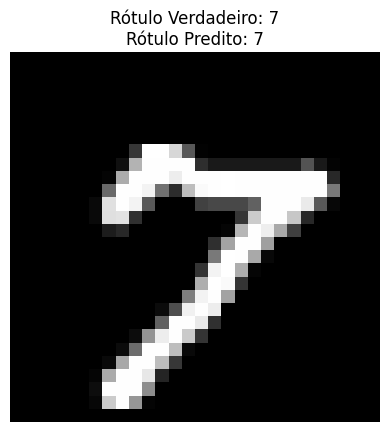

In [14]:
index = 9000
test_image = x_test[index:index+1]
true_label = y_test[index]

# Fazer a predição com o modelo treinado
predicted_probabilities = model.predict(test_image)
predicted_label = predicted_probabilities.argmax()  # Classe com maior probabilidade

# Exibir a imagem e os resultados
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')  # Exibir a imagem original
plt.title(f"Rótulo Verdadeiro: {true_label}\nRótulo Predito: {predicted_label}")
plt.axis('off')
plt.show() #Mostra resultados